SL-3 : Mini Project

Use the following covid_vaccine_statewise.csv dataset and perform following analytics on the 
given dataset https://www.kaggle.com/sudalairajkumar/covid19-in-india?select=covid_vaccine_statewise.csv 
a. Describe the dataset 
b. Number of persons state wise vaccinated for first dose in India 
c. Number of persons state wise vaccinated for second dose in India 
d. Number of Males vaccinated 
e. Number of females vaccinated

In [1]:
# Basic imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Machine Learning and Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv("StatewiseTestingDetails.csv")
# Preview data
df.head()


,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [2]:
# Check for null values
df.isnull().sum()

Date                0
State               0
TotalSamples        0
Negative         9367
Positive        10674
dtype: int64

In [3]:
# Drop rows with nulls (or use fillna if needed)
df.dropna(inplace=True)
print("Shape after dropping nulls:", df.shape)

Shape after dropping nulls: (3558, 5)


In [4]:
# Display data types
df.dtypes


Date             object
State            object
TotalSamples    float64
Negative         object
Positive        float64
dtype: object

In [5]:
# Label Encoding for 'State' column if it exists
if 'State' in df.columns:
 le = LabelEncoder()
 df['State'] = le.fit_transform(df['State'])
# Normalize numeric columns
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
# Summary of variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3558 entries, 0 to 15843
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3558 non-null   object 
 1   State         3558 non-null   float64
 2   TotalSamples  3558 non-null   float64
 3   Negative      3558 non-null   object 
 4   Positive      3558 non-null   float64
dtypes: float64(3), object(2)
memory usage: 166.8+ KB


C:\Users\Vaishali Pawar\AppData\Local\Temp\ipykernel_3176\807498219.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x="Features", y="Values",


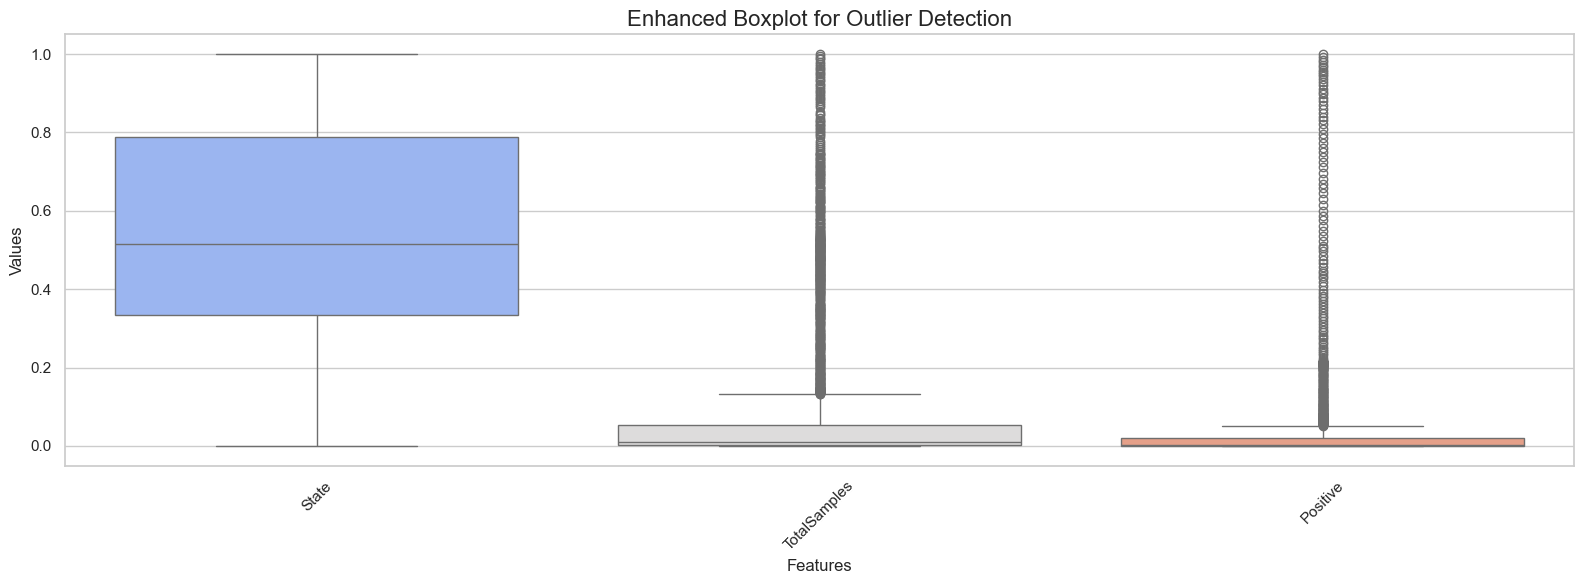

In [6]:
# Plot boxplots for numeric columns
import seaborn as sns
import matplotlib.pyplot as plt
# Set the style
sns.set(style="whitegrid")
# Create the figure
plt.figure(figsize=(16, 6))
# Melt the dataframe to long format for Seaborn
df_melted = df[numeric_cols].melt(var_name="Features",
value_name="Values")
# Create the boxplot
sns.boxplot(data=df_melted, x="Features", y="Values",
palette="coolwarm")
# Enhance the plot
plt.title("Enhanced Boxplot for Outlier Detection", fontsize=16)
plt.xticks(rotation=45)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.tight_layout()
# Show the plot
plt.show()


In [7]:
# Optional: Remove outliers using IQR method
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] >
(Q3 + 1.5 * IQR))).any(axis=1)]
print("Shape after outlier removal:", df.shape)


Shape after outlier removal: (3072, 5)


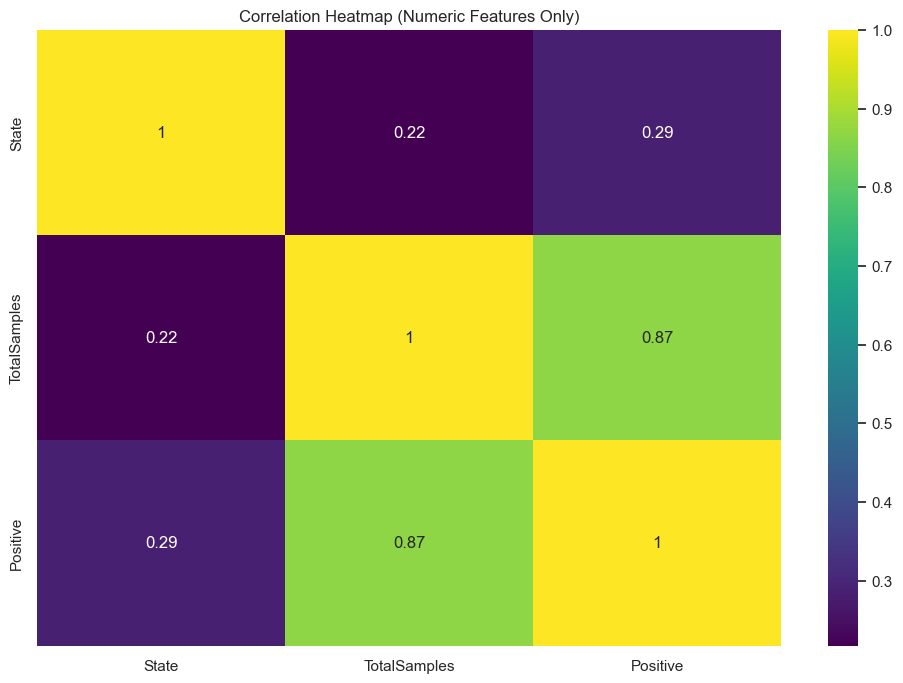

In [8]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="viridis")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [9]:
# Clean column names
df.columns = df.columns.str.strip()
# Print all column names to find correct target
print("Column Names:", df.columns.tolist())


Column Names: ['Date', 'State', 'TotalSamples', 'Negative', 'Positive']


In [10]:
# Load data and clean column names
df.columns = df.columns.str.strip()
df = df.dropna()
# Convert 'Date' to datetime and drop it
if 'Date' in df.columns:
 df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
 df = df.drop(columns=['Date'])
# Encode categorical variables
for col in df.select_dtypes(include=['object']).columns:
 le = LabelEncoder()
 df[col] = le.fit_transform(df[col])
# Define target column
target = 'TotalSamples' # Replace with correct column if needed
features = [col for col in df.columns if col != target]
X = df[features]
y = df[target]
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)
# Predict
y_pred = model.predict(X_test)
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")
print(f"R2 Score: {r2:.4f}")


Mean Squared Error: 0.0000
R2 Score: 0.9609


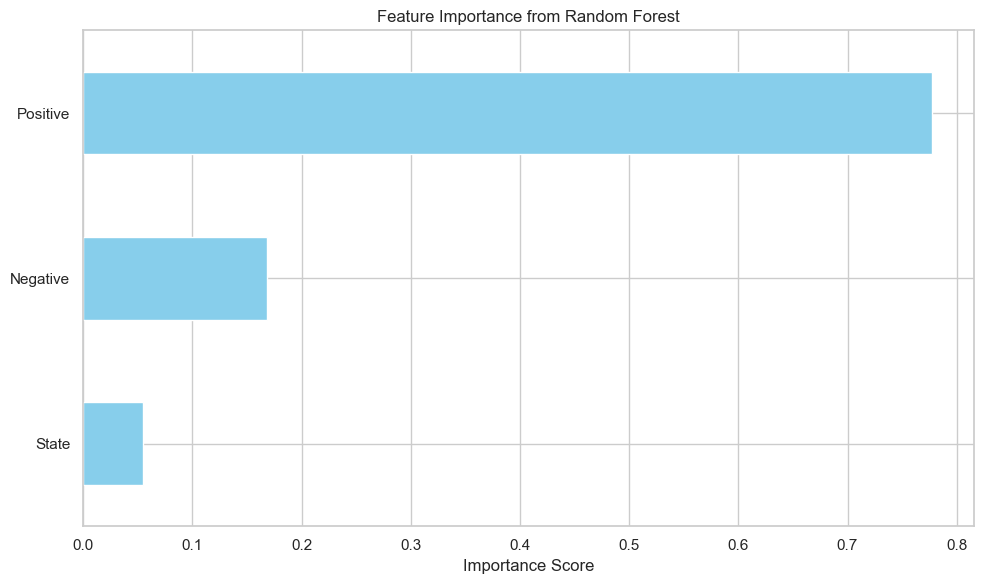

In [11]:
# Plot feature importance
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values()
plt.figure(figsize=(10, 6))
feat_imp.plot(kind='barh', color='skyblue')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

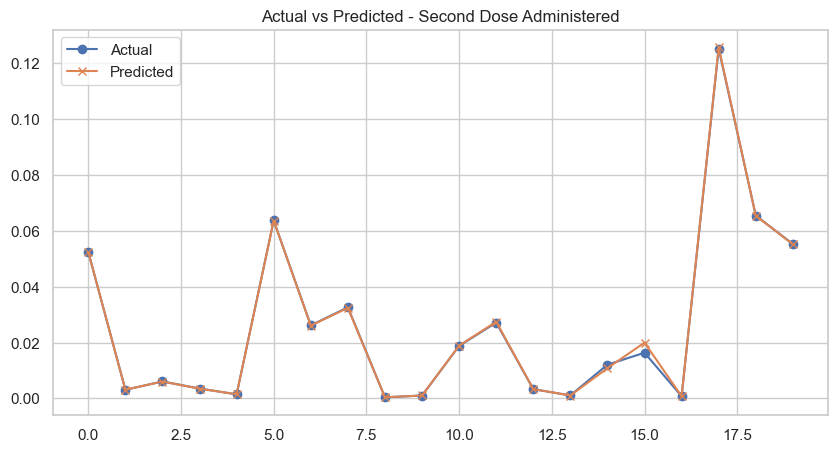

In [12]:
# Comparison plot
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:20], label='Actual', marker='o')
plt.plot(y_pred[:20], label='Predicted', marker='x')
plt.title("Actual vs Predicted - Second Dose Administered")
plt.legend()
plt.show()

In [17]:
# Describe the dataset
df.describe()


,State,TotalSamples,Negative,Positive
count,3072.000000,3072.000000,3072.000000,3072.000000
mean,0.543995,0.020613,1501.082357,0.007034
std,0.289720,0.027560,868.390409,0.010717
min,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.001330,747.750000,0.000188
50%,0.545455,0.006512,1494.500000,0.001237
75%,0.818182,0.033670,2253.250000,0.010010
max,1.000000,0.132808,3008.000000,0.051548


In [22]:
# Reading the csv file
data = pd.read_csv("covid_vaccine_statewise.csv")
df.head()

,State,TotalSamples,Negative,Positive
0,0.000000,0.000122,251,0.000007
453,0.030303,0.000157,211,0.000082
454,0.030303,0.000571,2301,0.000227
455,0.030303,0.000624,2456,0.000237
456,0.030303,0.000624,2450,0.000252


In [23]:
# Average of First Dose Administered
avg_firstdose = data["First Dose Administered"].astype("float").mean(axis = 0)
print("Average of First Dose:", avg_firstdose)

Average of First Dose: 7414415.300354284


In [26]:
# Replacing First Dose Administered
data["First Dose Administered"].fillna(value = avg_firstdose, inplace=True)

C:\Users\Vaishali Pawar\AppData\Local\Temp\ipykernel_3176\3272049846.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["First Dose Administered"].fillna(value = avg_firstdose, inplace=True)


In [27]:
# Average of Second Dose Administered
avg_seconddose = data["Second Dose Administered"].astype("float").mean(axis = 0)
print("Average of Second Dose:", avg_seconddose)

Average of Second Dose: 1773755.2436688098


In [29]:
# Replacing Second Dose Administered
data["Second Dose Administered"].fillna(value = avg_seconddose, inplace = True)

C:\Users\Vaishali Pawar\AppData\Local\Temp\ipykernel_3176\3258829007.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Second Dose Administered"].fillna(value = avg_seconddose, inplace = True)


In [30]:
# Number of persons state wise vaccinated for first dose
first_dose = data.groupby('State')[['First Dose Administered']].sum()
first_dose

,First Dose Administered
State,
Andaman and Nicobar Islands,6.091235e+07
Andhra Pradesh,1.277347e+09
Arunachal Pradesh,9.349147e+07
Assam,6.300867e+08
Bihar,1.514989e+09
Chandigarh,8.918960e+07
Chhattisgarh,8.404894e+08
Dadra and Nagar Haveli and Daman and Diu,8.549597e+07
Delhi,6.762404e+08


In [31]:
# Number of persons state wise vaccinated for second
first_dose = data.groupby('State')[['Second Dose Administered']].sum()
first_dose

,Second Dose Administered
State,
Andaman and Nicobar Islands,1.476109e+07
Andhra Pradesh,3.694601e+08
Arunachal Pradesh,2.257485e+07
Assam,1.414313e+08
Bihar,2.814331e+08
Chandigarh,2.223627e+07
Chhattisgarh,1.827629e+08
Dadra and Nagar Haveli and Daman and Diu,1.701070e+07
Delhi,2.006352e+08


In [32]:
# Number of Males vaccinated
male = data["Male(Individuals Vaccinated)"].sum()
print("The total number of male individuals vaccinated are", int(male))

The total number of male individuals vaccinated are 7138698858


In [33]:
# Number of females vaccinated
female = data["Female(Individuals Vaccinated)"].sum()
print("The total number of female individuals vaccinated are", int(female))

The total number of female individuals vaccinated are 6321628736
